# Week 6 Class Assignment

*   Evelyn Komalasari Hartono / 0706022310001
*   Evelin Alim Natadjaja / 0706022310021

## Import the library used

In [5]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

## Explanatory Data Analysis

In [6]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep= ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

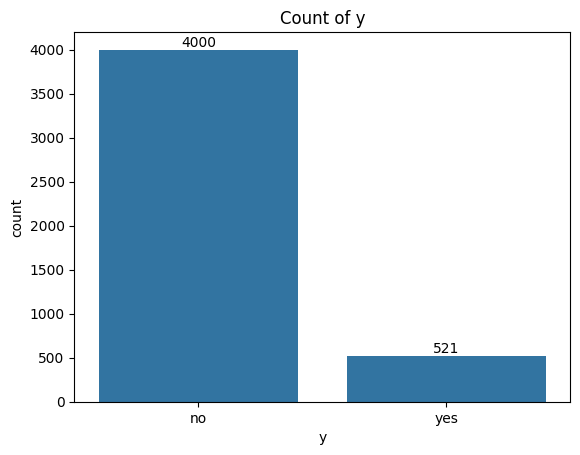

In [10]:
# show how many Y
ax = sns.countplot(data=df, x='y')
plt.title('Count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

We could see that there's significant difference on the values. Indicating the need to do either oversampling or undersampling to the data.

### Feauture Encoding

In [11]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: housing, loan, default, y

one_hot_map = {
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'default': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1},
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Ordinal Encoding
education_mapping = {'primary': 0,'secondary': 1,'tertiary': 2,'unknown': 3}
df_encoded['education'] = df_encoded['education'].map(education_mapping)

# Ordinal Encoding for 'month'
month_mapping = {'jan': 1,'feb': 2,'mar': 3,'apr': 4,'may': 5,'jun': 6,'jul': 7
                 ,'aug': 8,'sep': 9,'oct': 10,'nov': 11,'dec': 12}
df_encoded['month'] = df_encoded['month'].map(month_mapping)

# 3. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'marital', 'contact', 'poutcome']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3709,44,2.0,1.0,1,0,6649,1,0,0.0,19,11,354,2,-1,0,3.0,0
2815,37,9.0,2.0,1,0,267,0,0,0.0,13,5,121,1,-1,0,3.0,0
3789,47,4.0,1.0,2,0,0,0,0,0.0,27,10,508,1,-1,0,3.0,1
2330,26,9.0,2.0,1,0,7,1,0,0.0,22,7,188,2,-1,0,3.0,0
1941,57,3.0,1.0,0,0,0,0,0,2.0,9,6,257,2,-1,0,3.0,0


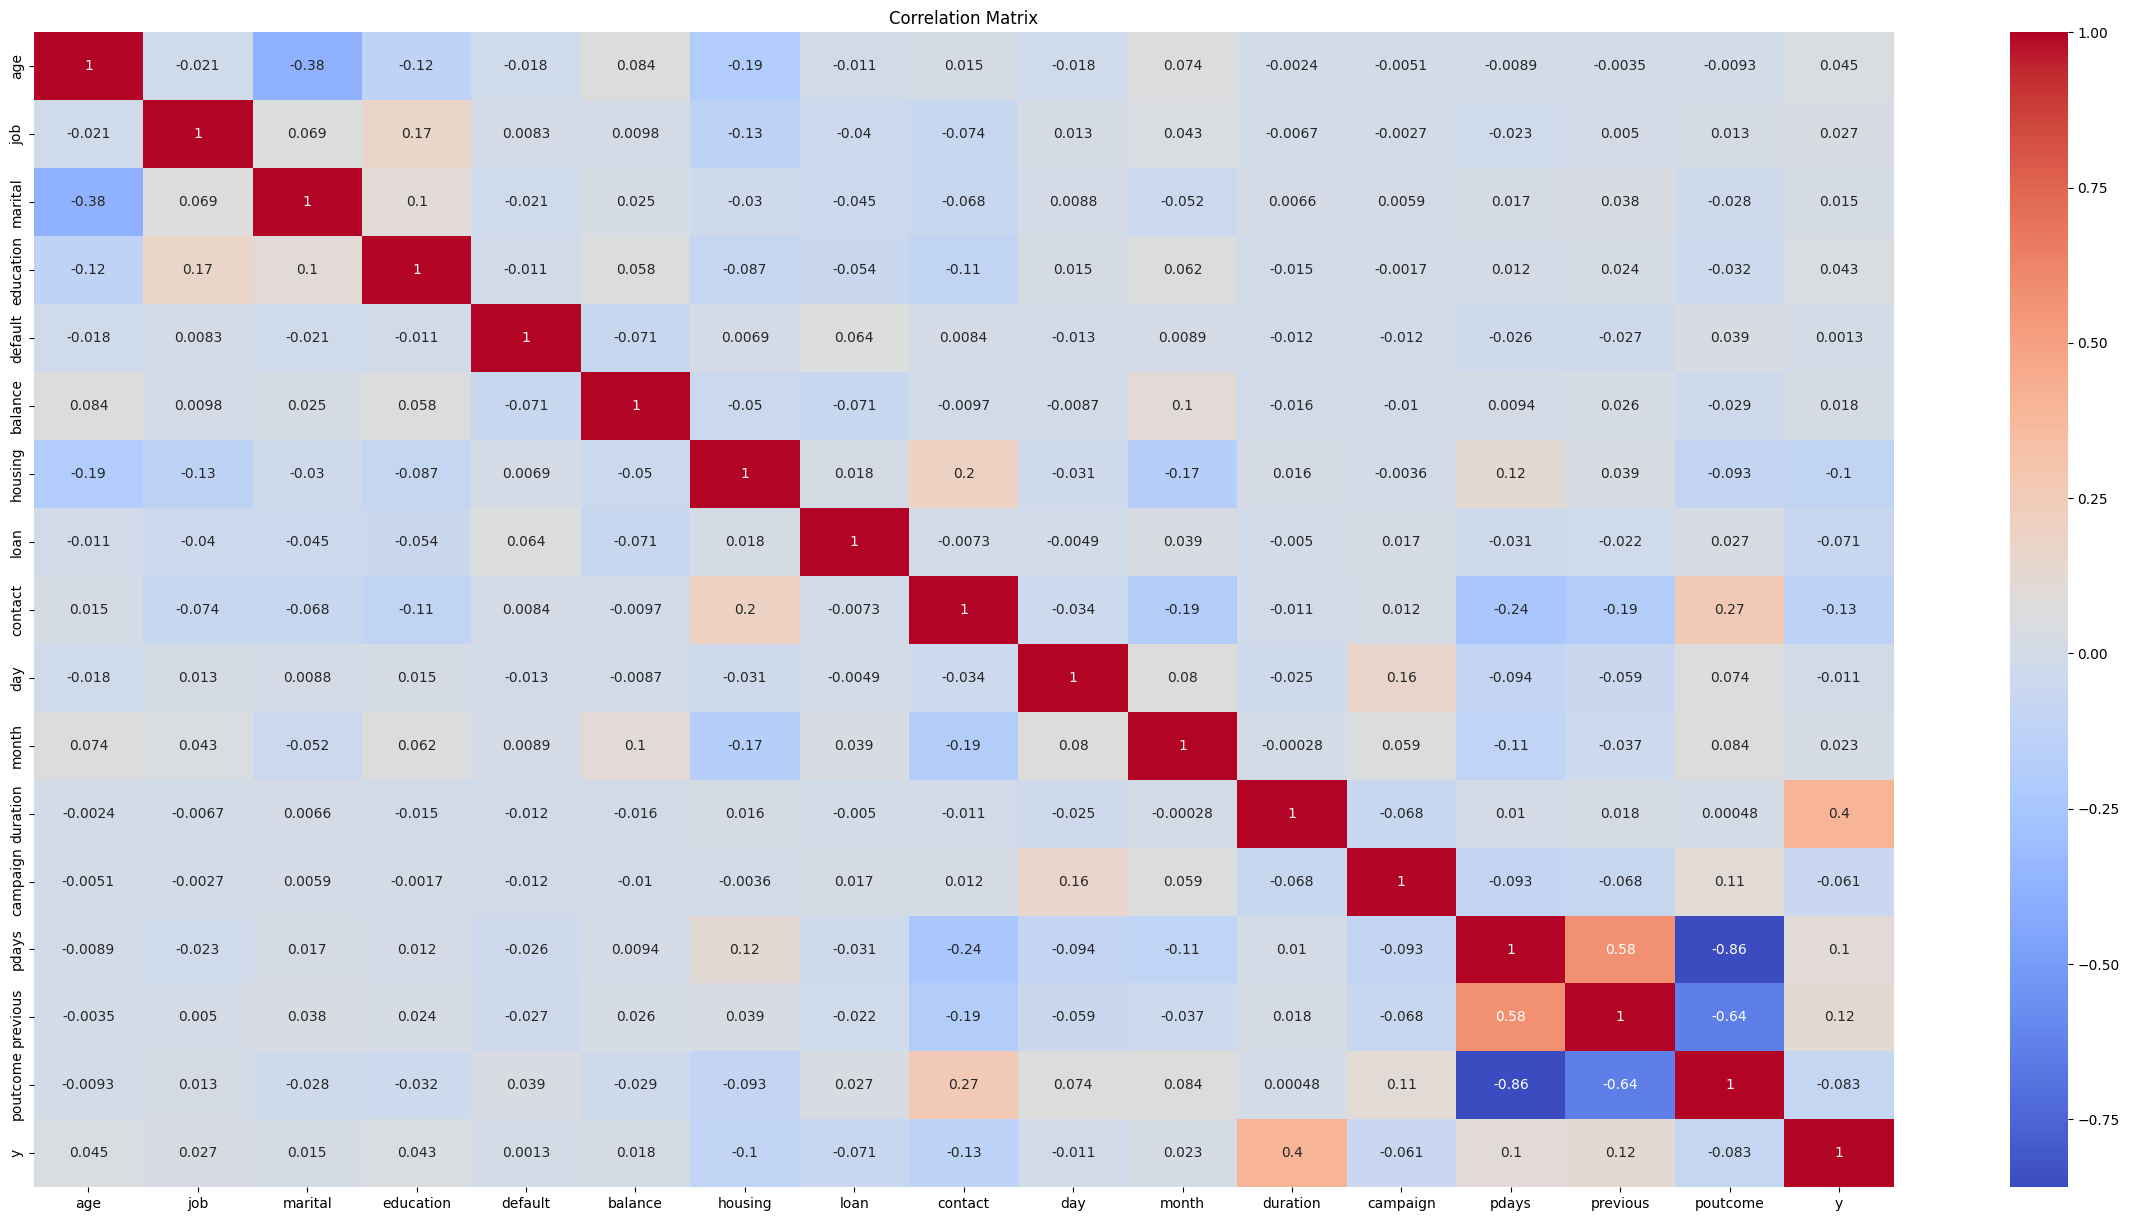

In [12]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Although most variables show weak relationships with each other, a few stand out with noticeably strong correlations:
1. pdays and poutcome: since both describe previous campaign history, I choose to keep pdays.
2. pdays and previous: both relate to past campaign frequency, but I decide to keep previous.
3. duration and y: indicates that longer call duration often leads to a successful subscription, so I choose duration.

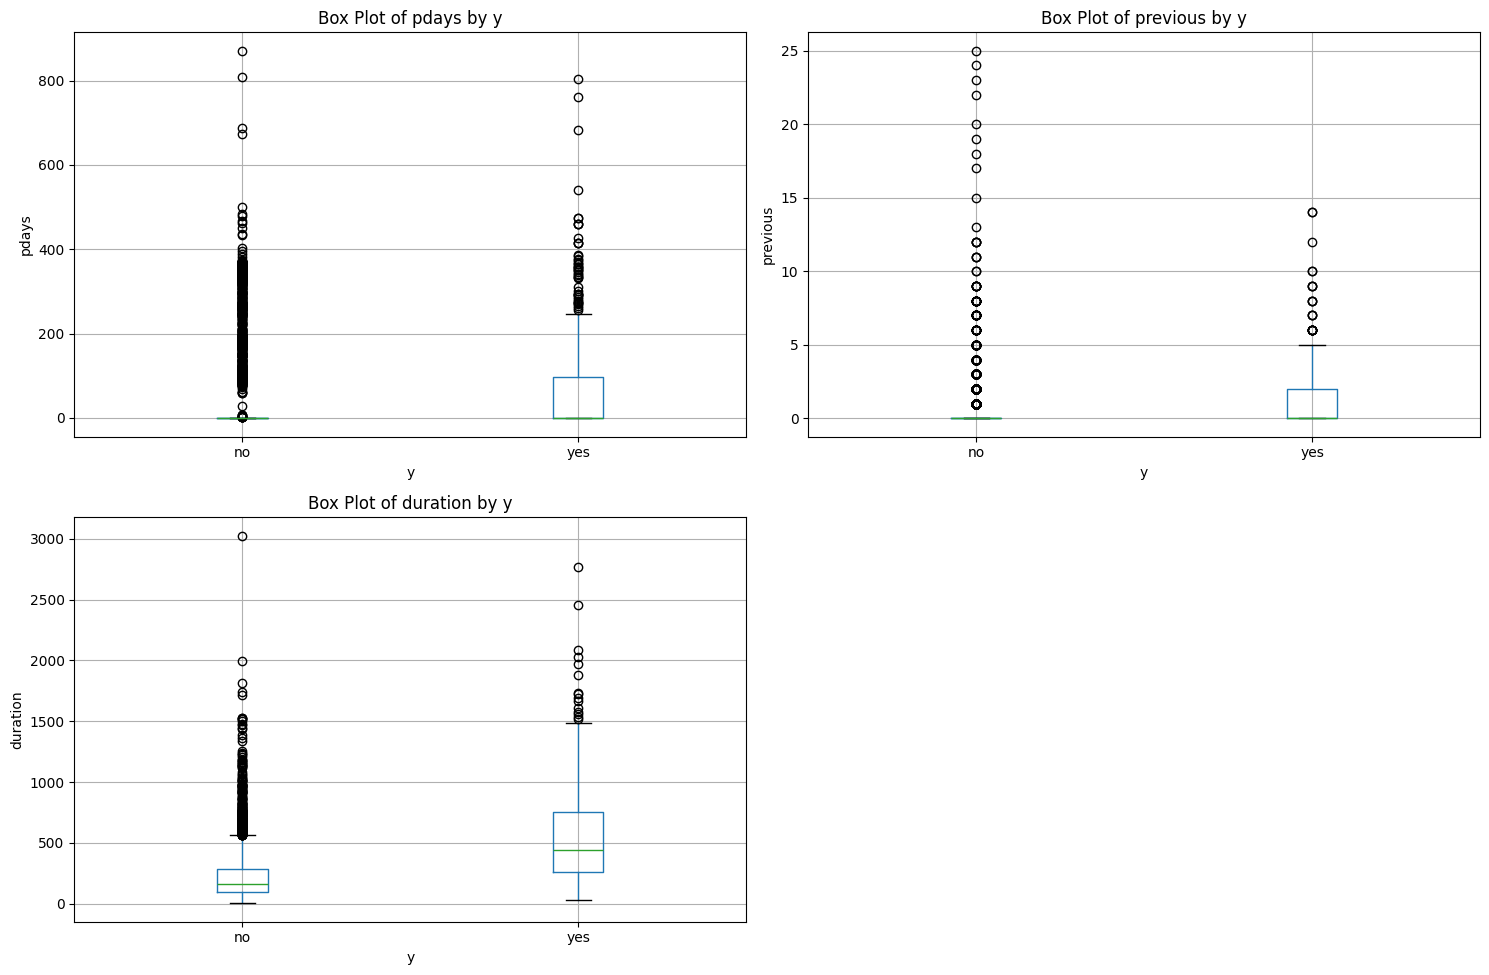

In [13]:
# Vsiualized the strong correlation mentioned above
cols = ["pdays", "previous", "duration"]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    df.boxplot(column=col, by="y", ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by y')
    axes[i].set_xlabel("y")
    axes[i].set_ylabel(col)

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("")
plt.tight_layout()
plt.show()


The box plots show that most people, no matter the result, have really low or even zero values for pdays and previous, meaning they weren’t contacted much before. Still, those who said yes usually have a bit higher values, which might mean they got more follow-ups. The biggest difference shows up in duration. This suggests that longer calls often lead to successful subscriptions, meanwhile pdays and previous still matter a too, just not much.


### Separate Features and Target

In [14]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [15]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0,0,1787,0,0,0.0,19,10,79,1,-1,0,3.0
1,33,7.0,1.0,1,0,4789,1,1,0.0,11,5,220,1,339,4,0.0
2,35,4.0,2.0,2,0,1350,1,0,0.0,16,4,185,1,330,1,0.0
3,30,4.0,1.0,2,0,1476,1,1,2.0,3,6,199,4,-1,0,3.0
4,59,1.0,1.0,1,0,0,1,0,2.0,5,5,226,1,-1,0,3.0


In [16]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


### Split Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [19]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month', 'poutcome'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

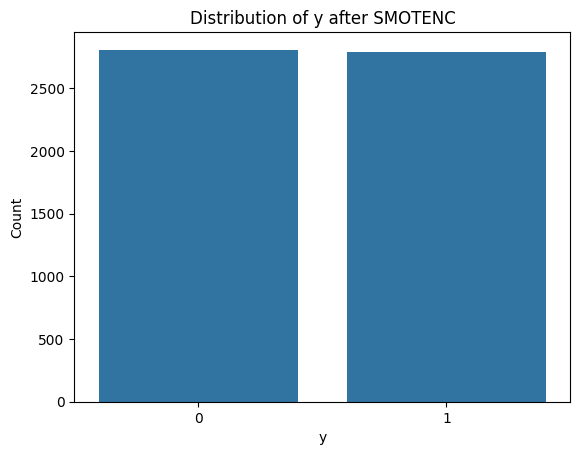

In [20]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

## Model Development

### No parameter used

#### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train_dt = tree.predict(X_train)
y_pred_test_dt = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_dt))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_dt))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1192
           1       0.86      0.89      0.88      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



Using the decision tree model, it shows that the model is overfitting, however the data distribution has been handled by oversampling so the F1-score is good

#### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_rf))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_rf))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1192
           1       0.92      0.93      0.93      1208

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



Random forest model gives higher accuracy and f1-score than decision tree model, but the model is overfitting

#### Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_gb))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_gb))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2808
           1       0.90      0.92      0.91      2792

    accuracy                           0.91      5600
   macro avg       0.91      0.91      0.91      5600
weighted avg       0.91      0.91      0.91      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1192
           1       0.88      0.88      0.88      1208

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



From the classification report, gradient boosting model has similar accuracy and f1-score to decision tree model. However, this model manage to handle the overfitting problem

#### KFold Cross Validation

In [24]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [25]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 0), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.88009889 0.89408867 0.87392901 0.88888889 0.8720857 ]
Average score: 0.88


In [26]:
from sklearn.ensemble import RandomForestClassifier

score = cross_val_score(RandomForestClassifier(random_state= 0), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.92394015 0.93143916 0.91383495 0.93186004 0.9276808 ]
Average score: 0.93


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

score = cross_val_score(GradientBoostingClassifier(random_state= 0), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.88943489 0.89634146 0.89197345 0.90799031 0.89480198]
Average score: 0.90


I use K-fold cross validation to evaluate the models

### Hyperparameter Tuning using GridSearchCV



#### Decision Tree Classifier

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [7, 25]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=7, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 7 folds for each of 72 candidates, totalling 504 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 7}
Best cross-validation f1 score: 0.878


The f1 score didn't change much even by tuning the parameter

#### Random Forest Classifier

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15, 23],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1 )
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)

Best parameters:  {'bootstrap': False, 'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator:  RandomForestClassifier(bootstrap=False, max_depth=23)


#### Gradient Boosting

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 7, 15],
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

print("Best parameters: ", best_params)

Best parameters:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


Now that we know the best parameters for each model, we will perform feature selection using feature importance

### Feature Importance

In [31]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.0539112  0.03626615 0.00977021 0.0239177  0.0005763  0.08689218
 0.02524103 0.03873882 0.0689237  0.05975697 0.06953069 0.36503823
 0.0234868  0.06534801 0.00334162 0.06926039]


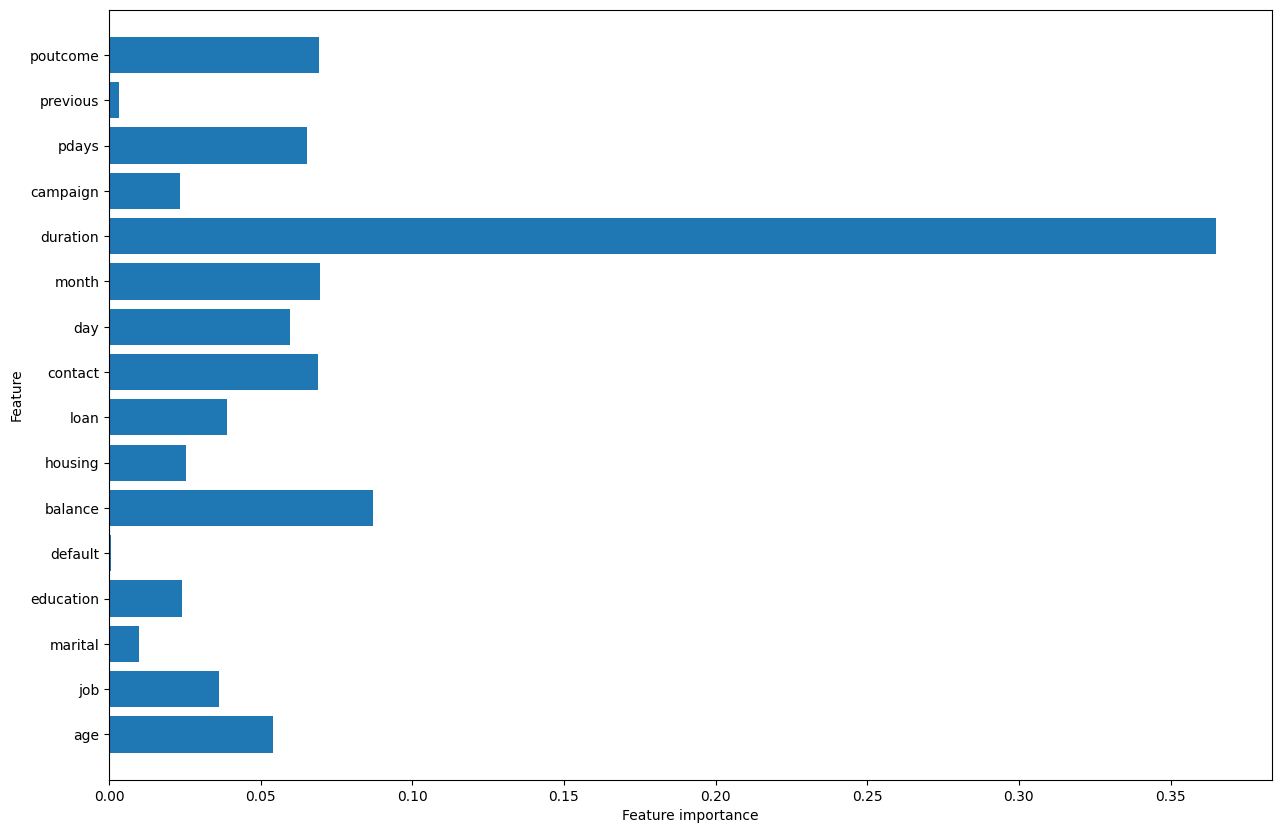

In [32]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [33]:
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.365038
balance,0.086892
month,0.069531
poutcome,0.069260
contact,0.068924
pdays,0.065348
day,0.059757
age,0.053911


In [34]:
# using only important features for the prediction
important_features = ["duration", "balance", "month", "poutcome", "contact", "pdays", "day"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [35]:
display(X_importance)
display(y_importance)

,duration,balance,month,poutcome,contact,pdays,day
0,79,1787,10,3.0,0.0,-1,19
1,220,4789,5,0.0,0.0,339,11
2,185,1350,4,0.0,0.0,330,16
3,199,1476,6,3.0,2.0,-1,3
4,226,0,5,3.0,2.0,-1,5
...,...,...,...,...,...,...,...
4516,329,-333,7,3.0,0.0,-1,30
4517,153,-3313,5,3.0,2.0,-1,9
4518,151,295,8,3.0,0.0,-1,19
4519,129,1137,2,1.0,0.0,211,6


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [36]:
# Oversampling
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = ['contact', 'poutcome']

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 7), (2400, 7))

#### Decision Tree Classifier

In [37]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

importance_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=7)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance_dt = importance_tree.predict(X_train_importance)
y_pred_test_importance_dt = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance_dt))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance_dt))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2808
           1       0.98      0.99      0.99      2792

    accuracy                           0.99      5600
   macro avg       0.99      0.99      0.99      5600
weighted avg       0.99      0.99      0.99      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1192
           1       0.87      0.90      0.89      1208

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



The f1 score and accuracy increased a little after selecting only important features

#### Random Forest Classifier

In [38]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

importance_rf = RandomForestClassifier(bootstrap=False, max_depth=23, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
importance_rf.fit(X_train_importance, y_train_importance)

y_pred_train_importance_rf = importance_rf.predict(X_train_importance)
y_pred_test_importance_rf = importance_rf.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance_rf))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance_rf))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1192
           1       0.90      0.94      0.92      1208

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



The random forest model has a similar f1 score and accuracy too before and after tuning

#### Gradient Boosting Classifier

In [39]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

importance_rf = GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200)
importance_rf.fit(X_train_importance, y_train_importance)

y_pred_train_importance_gb = importance_rf.predict(X_train_importance)
y_pred_test_importance_gb = importance_rf.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance_gb))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance_gb))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1192
           1       0.90      0.94      0.92      1208

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



The f1 score and accuracy increased for gradient boosting after hyperparameter tuning

## Model Evaluation

### Confusion Matrix

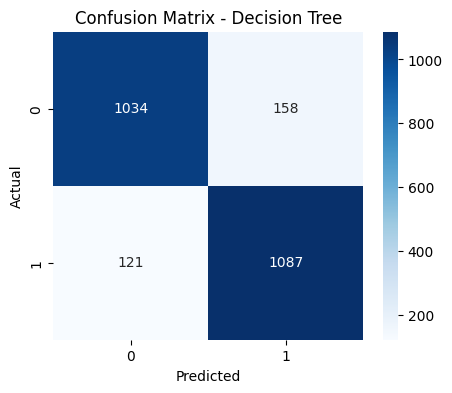

Decision Tree → Accuracy: 0.8838, Precision: 0.8841, Recall: 0.8838, F1-score: 0.8837



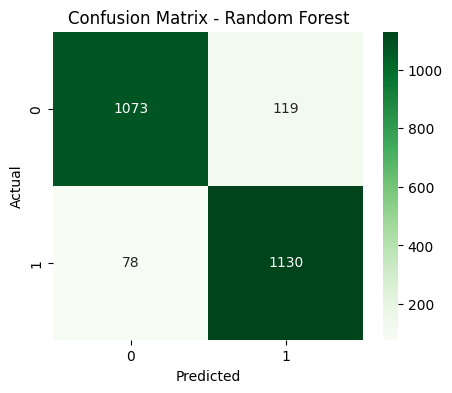

Random Forest → Accuracy: 0.9179, Precision: 0.9184, Recall: 0.9179, F1-score: 0.9179



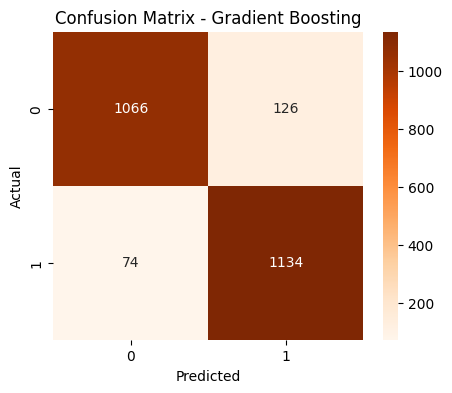

Gradient Boosting → Accuracy: 0.9167, Precision: 0.9174, Recall: 0.9167, F1-score: 0.9166


In [40]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_importance, y_pred_test_importance_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

acc_dt = accuracy_score(y_test_importance, y_pred_test_importance_dt)
prec_dt = precision_score(y_test_importance, y_pred_test_importance_dt, average='weighted', zero_division=0)
rec_dt = recall_score(y_test_importance, y_pred_test_importance_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test_importance, y_pred_test_importance_dt, average='weighted', zero_division=0)

print(f"Decision Tree → Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {rec_dt:.4f}, F1-score: {f1_dt:.4f}\n")

# Random Forest
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_importance, y_pred_test_importance_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

acc_rf = accuracy_score(y_test_importance, y_pred_test_importance_rf)
prec_rf = precision_score(y_test_importance, y_pred_test_importance_rf, average='weighted', zero_division=0)
rec_rf = recall_score(y_test_importance, y_pred_test_importance_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test_importance, y_pred_test_importance_rf, average='weighted', zero_division=0)

print(f"Random Forest → Accuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {rec_rf:.4f}, F1-score: {f1_rf:.4f}\n")

# Gradient Boosting
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_importance, y_pred_test_importance_gb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

acc_gb = accuracy_score(y_test_importance, y_pred_test_importance_gb)
prec_gb = precision_score(y_test_importance, y_pred_test_importance_gb, average='weighted', zero_division=0)
rec_gb = recall_score(y_test_importance, y_pred_test_importance_gb, average='weighted', zero_division=0)
f1_gb = f1_score(y_test_importance, y_pred_test_importance_gb, average='weighted', zero_division=0)

print(f"Gradient Boosting → Accuracy: {acc_gb:.4f}, Precision: {prec_gb:.4f}, Recall: {rec_gb:.4f}, F1-score: {f1_gb:.4f}")

### Comparison Data Frame

In [41]:
comparison_df = pd.DataFrame([
    ['Decision Tree', acc_dt, prec_dt, rec_dt, f1_dt],
    ['Random Forest', acc_rf, prec_rf, rec_rf, f1_rf],
    ['Gradient Boosting', acc_gb, prec_gb, rec_gb, f1_gb]
], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-score']] = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-score']].round(3)
print("\n=== Model Performance Comparison (Test Set) ===")
print(comparison_df)


=== Model Performance Comparison (Test Set) ===
               Model  Accuracy  Precision  Recall  F1-score
0      Decision Tree     0.884      0.884   0.884     0.884
1      Random Forest     0.918      0.918   0.918     0.918
2  Gradient Boosting     0.917      0.917   0.917     0.917


## Discussion & Insights

1. Which model performed best overall?

Random Forest model. It manages to achieve the best overall performance with the highest accuracy, precision, recall, and f-1 score. Indicating that random forest delivered the most balanced and reliable predictions compared to the other two models. With clearly surpassing decision tree and slightly outperforming gradient boosting.

2. Did ensemble methods (RF, XGBoost/Gradient Boosting) improve performance compared to a single Decision Tree?

Yes, in which both random forest and gradient boosting did improve over the decision tree. While the decision tree reached an accuracy of 0.884, random forest and gradient boosting achieved 0.920 and 0.916 respectively. This improvement highlights on how ensemble techniques, which combine multiple weak learners, can reduce overfitting and better capture complex relationships within the data.

3. How could the bank use these insights to refine its marketing strategy?

The bank can use the random forest model to more accurately predict whether the customer will likely to subscribe. Which will also allow them to plam a more targeted and efficient marketing (focusing more on high-probability customers as well as reducing unnecessary to those who's unlikely to respond). This way, over time the approach could lower marketing costs, boost conversion rates. Not to mention improve customer satisfaction through more personalized campaigns.

Other than that, with examining the model's feature importance, they could be helped to undestand which factors most influence their customers decision, furthermore supporting more strategic planning.